### Importing Packages

In [173]:
# For Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

# For Data Visualization

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as pyo

from plotly.subplots import make_subplots
from plotly.offline import plot


# For Additional Use
import datetime
import calendar

# Template
pio.templates.default = "ggplot2"

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


### Data Checking

In [174]:
df = pd.read_csv('Startups in 2021 end.csv',index_col=0)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           936 non-null    object
 1   Valuation ($B)    936 non-null    object
 2   Date Joined       936 non-null    object
 3   Country           936 non-null    object
 4   City              921 non-null    object
 5   Industry          936 non-null    object
 6   Select Investors  935 non-null    object
dtypes: object(7)
memory usage: 58.5+ KB


In [176]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
count,936,936,936,936,921,936,935
unique,935,192,589,47,239,17,920
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,"Speedinvest, Valar Ventures, Uniqa Ventures"
freq,2,225,8,477,134,190,2


<Axes: >

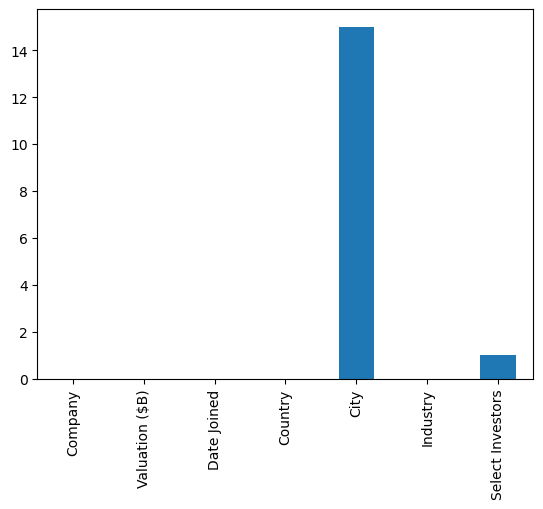

In [177]:
df.isnull().sum().plot(kind='bar')

### Data Preprocessing

#### Renaming Columns

In [178]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors'],
      dtype='object')

In [179]:
column_name_remapping = {
    'Company' : 'Name',
    'Valuation ($B)' : 'Valuation',
    'Date Joined' : 'Date',
    'Country' : 'Country',
    'City' : 'City',
    'Industry' : 'Industry',
    'Select Investors' : 'Investors',
}

In [180]:
df.rename(columns=column_name_remapping, inplace= True)
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [181]:
df['Date'] = pd.to_datetime(df['Date'])

In [182]:
df['Valuation'] = df['Valuation'].str.replace('$','').str.replace(',','').astype(float)

In [183]:
df['Name'].value_counts()

Bolt              2
Bytedance         1
Prime Medicine    1
Pilot.com         1
Aibee             1
                 ..
Skydance Media    1
Greenlight        1
Highspot          1
Bowery Farming    1
Pet Circle        1
Name: Name, Length: 935, dtype: int64

In [184]:
df[df['Name']== 'Bolt']

,Name,Valuation,Date,Country,City,Industry,Investors
94,Bolt,6.00,2021-10-08,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
141,Bolt,4.75,2018-05-29,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"


In [185]:
df['Year'] = df['Date'].dt.year
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


#### List of Investors

In [186]:
from collections import Counter

investors = []
for i in df['Investors'].dropna().str.split(','):
    for j in i:
        investors.append(j)

investor_counts = Counter(investors)
df_investor = pd.DataFrame.from_dict(investor_counts, orient='index', columns=['Frequency'])
df_investor

,Frequency
Sequoia Capital China,29
SIG Asia Investments,3
Sina Weibo,2
Softbank Group,8
Founders Fund,4
...,...
RRE Ventures+,1
FTV Capital,1
Ten Eleven Ventures,1
Prysm Capital,1


In [187]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


#### Standardization

##### Industry

In [188]:
df['Industry'] = df['Industry'].replace(['Artificial Intelligence ','Artificial intelligence','Finttech'],['Artificial Intelligence','Artificial Intelligence', 'Fintech'])
df['Industry'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel'], dtype=object)

##### Country

In [189]:
df['Country'] = df['Country'].replace(['United States,','Indonesia,'],['United States','Indonesia'])
df['Country'].unique()


array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia'], dtype=object)

##### City

In [190]:
df[df['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year
11,FTX,25.0,2021-07-20,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank",2021
192,HyalRoute,3.5,2020-05-26,Singapore,NaN,Mobile & telecommunications,Kuang-Chi,2020
399,Advance Intelligence Group,2.0,2021-09-23,Singapore,NaN,Artificial Intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund",2021
572,Trax,1.3,2019-07-22,Singapore,NaN,Artificial Intelligence,"Hopu Investment Management, Boyu Capital, DC T...",2019
677,Amber Group,1.1,2021-06-21,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021
682,Carousell,1.1,2021-09-15,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021
735,WeLab,1.0,2017-11-08,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene...",2017
812,PatSnap,1.0,2021-03-16,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner...",2021
840,Moglix,1.0,2021-05-17,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway",2021
843,Matrixport,1.0,2021-06-01,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS...",2021


In [191]:
df.loc[df['Country']=='Hong Kong', 'City'] = 'Hong Kong'
df.loc[df['Country']=='Singapore', 'City'] = 'Singapore'

In [192]:
df[df['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


##### Investors

In [193]:
df[df['Investors'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year
710,LinkSure Network,1.0,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN,2015


In [194]:
df = df.dropna(subset=['Investors'])

In [195]:
df[df['Investors'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


<Axes: >

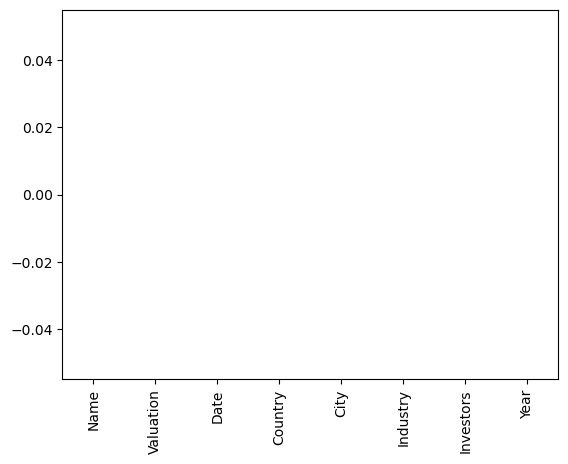

In [196]:
df.isnull().sum().plot(kind='bar')

### Analysis

#### Distribution

##### Valuation

In [197]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


Valuation Value

In [198]:
fig1 = px.histogram(df, x="Valuation", marginal='rug')
fig1.show()

# Trial

In [199]:
min(df['Valuation'])

1.0

In [200]:
df.head()

,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [201]:
trial_year_industry = df.groupby(['Year','Industry'])['Valuation'].sum()
trial_year_industry

Year  Industry                           
2007  E-commerce & direct-to-consumer          1.38
2010  E-commerce & direct-to-consumer          3.00
2011  Fintech                                 45.60
      Internet software & services             5.70
2012  Artificial Intelligence                  2.00
                                              ...  
2021  Internet software & services           218.60
      Mobile & telecommunications              9.75
      Other                                   32.33
      Supply chain, logistics, & delivery     49.80
      Travel                                   5.00
Name: Valuation, Length: 111, dtype: float64

In [202]:
trial_year_country = df.groupby(['Year','Country'])['Valuation'].sum()
trial_year_country

Year  Country             
2007  France                    1.38
2010  China                     3.00
2011  Sweden                   45.60
      United States             5.70
2012  Hong Kong                 2.00
                               ...  
2021  Turkey                    8.50
      United Arab Emirates      1.00
      United Kingdom           28.78
      United States           551.04
      Vietnam                   3.00
Name: Valuation, Length: 127, dtype: float64

In [203]:
trial_year_industry[2021]

Industry
Artificial Intelligence                 44.15
Auto & transportation                   16.55
Consumer & retail                       15.88
Cybersecurity                           56.63
Data management & analytics             34.88
E-commerce & direct-to-consumer         82.08
Edtech                                  23.15
Fintech                                295.40
Hardware                                16.79
Health                                  71.75
Internet software & services           218.60
Mobile & telecommunications              9.75
Other                                   32.33
Supply chain, logistics, & delivery     49.80
Travel                                   5.00
Name: Valuation, dtype: float64

In [204]:
trial_year = df.groupby('Year')['Valuation'].sum()
trial_year

Year
2007      1.38
2010      3.00
2011     51.30
2012    122.30
2013      4.30
2014    165.38
2015     98.55
2016     81.04
2017    296.14
2018    495.47
2019    416.08
2020    362.48
2021    972.74
Name: Valuation, dtype: float64

In [205]:
trial_industry = df.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)
trial_industry

Industry
Fintech                                744.13
Internet software & services           483.76
Artificial Intelligence                312.84
E-commerce & direct-to-consumer        291.10
Other                                  245.46
Health                                 166.26
Supply chain, logistics, & delivery    146.29
Data management & analytics            121.70
Cybersecurity                          107.54
Hardware                                98.59
Auto & transportation                   89.30
Edtech                                  85.37
Mobile & telecommunications             78.09
Consumer & retail                       64.13
Travel                                  35.60
Name: Valuation, dtype: float64

In [206]:
trial_country  = df.groupby('Country')['Valuation'].sum().sort_values(ascending=False)
trial_country

Country
United States           1605.03
China                    568.48
United Kingdom           150.29
India                    148.45
Germany                   66.63
Brazil                    61.05
Sweden                    58.08
Australia                 50.60
Israel                    43.82
Hong Kong                 41.45
Canada                    37.73
France                    35.61
Indonesia                 27.90
South Korea               24.69
Mexico                    15.20
Singapore                 14.90
Netherlands               14.30
Japan                      8.82
Turkey                     8.50
Belgium                    7.55
Colombia                   6.40
Ireland                    6.20
Spain                      5.95
Austria                    5.81
Switzerland                5.60
Estonia                    4.75
Lithuania                  4.53
United Arab Emirates       4.50
Norway                     3.80
Philippines                3.00
Vietnam                    3.00


In [207]:
df[df['Country']=='Indonesia']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
14,J&T Express,20.0,2021-04-07,Indonesia,Jakarta,"Supply chain, logistics, & delivery","Hillhouse Capital Management, Boyu Capital, Se...",2021
226,Traveloka,3.0,2017-01-01,Indonesia,Jakarta,Travel,"Global Founders Capital, East Ventures, Expedi...",2017
262,Ovo,2.9,2019-03-14,Indonesia,Jakarta,Fintech,"Grab, Tokopedia, Tokyo Century Corporation",2019
891,Xendit,1.0,2021-09-14,Indonesia,Jakarta,Fintech,"Accel, Y Combinator, Amasia",2021
900,Ajaib,1.0,2021-10-04,Indonesia,Jakarta,Fintech,"Softbank Ventures Asia, Alpha JWC Ventures, In...",2021


In [208]:
df[df['Country']=='Malaysia']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
580,Carsome,1.3,2021-07-12,Malaysia,Selangor,E-commerce & direct-to-consumer,"Gobi Partners, 500 Startups, Ondine Capital",2021


In [209]:
df[df['Country']=='Thailand']

,Name,Valuation,Date,Country,City,Industry,Investors,Year
516,Ascend Money,1.5,2021-09-27,Thailand,Bangkok,Fintech,"Ant Group, Charoen Pokphand Group, Bow Wave Ca...",2021
802,Flash Express,1.0,2021-02-01,Thailand,Bangkok,"Supply chain, logistics, & delivery","SCB 10X, Krungsri Finnovate, eWTP Capital",2021


In [210]:
trial0 = df
trial0.head()


,Name,Valuation,Date,Country,City,Industry,Investors,Year
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [211]:
trial0[trial0['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year


In [212]:
trial0.loc[trial0['Country'] == 'Hong Kong', 'City'] = 'Hong Kong'
trial0.loc[trial0['Country'] == 'Singapore', 'City'] = 'Singapore'


In [213]:
trial0[trial0['City'].isna()]

,Name,Valuation,Date,Country,City,Industry,Investors,Year
